<a href="https://colab.research.google.com/github/eve-okorie16/testrep/blob/main/Heart_Disease_Analysis_byTemitayo_Badewole_and_Toluwalope_Temenu_and_Ozioma_Okorie_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Attribute Information
#### Age: age of the patient [years]
#### Sex: sex of the patient [M: Male, F: Female]
#### ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
#### RestingBP: resting blood pressure [mm Hg]
#### Cholesterol: serum cholesterol [mm/dl]
#### FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
#### RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
#### MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
#### ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
#### Oldpeak: oldpeak = ST [Numeric value measured in depression]
#### ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
#### HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Transforming the Categorical columns

In [ ]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
data[['ChestPainType', 'RestingECG', 'ST_Slope']] = data[['ChestPainType', 'RestingECG', 'ST_Slope']].apply(encoder.fit_transform)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,1,172,N,0.0,2,0
1,49,F,2,160,180,0,1,156,N,1.0,1,1
2,37,M,1,130,283,0,2,98,N,0.0,2,0
3,48,F,0,138,214,0,1,108,Y,1.5,1,1
4,54,M,2,150,195,0,1,122,N,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,3,110,264,0,1,132,N,1.2,1,1
914,68,M,0,144,193,1,1,141,N,3.4,1,1
915,57,M,0,130,131,0,1,115,Y,1.2,1,1
916,57,F,1,130,236,0,0,174,N,0.0,1,1


In [ ]:
data = pd.get_dummies(data, columns = ['Sex', 'ExerciseAngina'])
data

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,40,1,140,289,0,1,172,0.0,2,0,0,1,1,0
1,49,2,160,180,0,1,156,1.0,1,1,1,0,1,0
2,37,1,130,283,0,2,98,0.0,2,0,0,1,1,0
3,48,0,138,214,0,1,108,1.5,1,1,1,0,0,1
4,54,2,150,195,0,1,122,0.0,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,3,110,264,0,1,132,1.2,1,1,0,1,1,0
914,68,0,144,193,1,1,141,3.4,1,1,0,1,1,0
915,57,0,130,131,0,1,115,1.2,1,1,0,1,0,1
916,57,1,130,236,0,0,174,0.0,1,1,1,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               918 non-null    int64  
 1   ChestPainType     918 non-null    int64  
 2   RestingBP         918 non-null    int64  
 3   Cholesterol       918 non-null    int64  
 4   FastingBS         918 non-null    int64  
 5   RestingECG        918 non-null    int64  
 6   MaxHR             918 non-null    int64  
 7   Oldpeak           918 non-null    float64
 8   ST_Slope          918 non-null    int32  
 9   HeartDisease      918 non-null    int64  
 10  Sex_F             918 non-null    uint8  
 11  Sex_M             918 non-null    uint8  
 12  ExerciseAngina_N  918 non-null    uint8  
 13  ExerciseAngina_Y  918 non-null    uint8  
dtypes: float64(1), int32(1), int64(8), uint8(4)
memory usage: 71.8 KB


In [ ]:
data.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.887364,1.361656,0.553377,0.210240,0.789760,0.595861,0.404139
std,9.432617,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,1.066570,0.607056,0.497414,0.407701,0.407701,0.490992,0.490992
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,60.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.500000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,6.200000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isna().sum()

Age                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
FastingBS           0
RestingECG          0
MaxHR               0
Oldpeak             0
ST_Slope            0
HeartDisease        0
Sex_F               0
Sex_M               0
ExerciseAngina_N    0
ExerciseAngina_Y    0
dtype: int64

### Data appears clean 

##  EDA QUESTIONS AND ANSWERS

### 1. Since the HeartDisease is the output column, can we know the count of those who had Heart disease based on their Sex?

In [ ]:
data.groupby(['Sex_F', 'Sex_M'])['HeartDisease'].count()

Sex_F  Sex_M
0      1        725
1      0        193
Name: HeartDisease, dtype: int64

### This shows that 725 men were diagnosed with heart disease while only 193 women had the same disease in a sample of 918 people

### 2. Can we find any underaged with Heart disease in this sample data?

In [ ]:
data.groupby(data['Age']<18).count()['HeartDisease']

Age
False    918
Name: HeartDisease, dtype: int64

#### This shows that no individual below the age of 18 who had the disease.

# Data Visualizations

In [ ]:
import seaborn as sns

In [ ]:
# finding the relationship between the features
corr = data.corr()                              #the warmer the color, the higher the correllation.
corr.style.background_gradient(cmap = 'icefire')

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
Age,1.000000,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.258612,-0.268264,0.282039,-0.055750,0.055750,-0.215793,0.215793
ChestPainType,-0.077150,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.177377,0.213521,-0.386828,0.126559,-0.126559,0.354727,-0.354727
RestingBP,0.254399,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.164803,-0.075162,0.107589,-0.005133,0.005133,-0.155101,0.155101
Cholesterol,-0.095282,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,0.050148,0.111471,-0.232741,0.200092,-0.200092,0.034166,-0.034166
FastingBS,0.198039,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.052698,-0.175774,0.267291,-0.120076,0.120076,-0.060451,0.060451
RestingECG,-0.007484,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,-0.020438,-0.006778,0.057384,-0.071552,0.071552,-0.077500,0.077500
MaxHR,-0.382045,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.160691,0.343419,-0.400421,0.189186,-0.189186,0.370425,-0.370425
Oldpeak,0.258612,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,1.000000,-0.501921,0.403951,-0.105734,0.105734,-0.408752,0.408752
ST_Slope,-0.268264,0.213521,-0.075162,0.111471,-0.175774,-0.006778,0.343419,-0.501921,1.000000,-0.558771,0.150693,-0.150693,0.428706,-0.428706
HeartDisease,0.282039,-0.386828,0.107589,-0.232741,0.267291,0.057384,-0.400421,0.403951,-0.558771,1.000000,-0.305445,0.305445,-0.494282,0.494282


#### There appears to be no strong relationship between the variables.

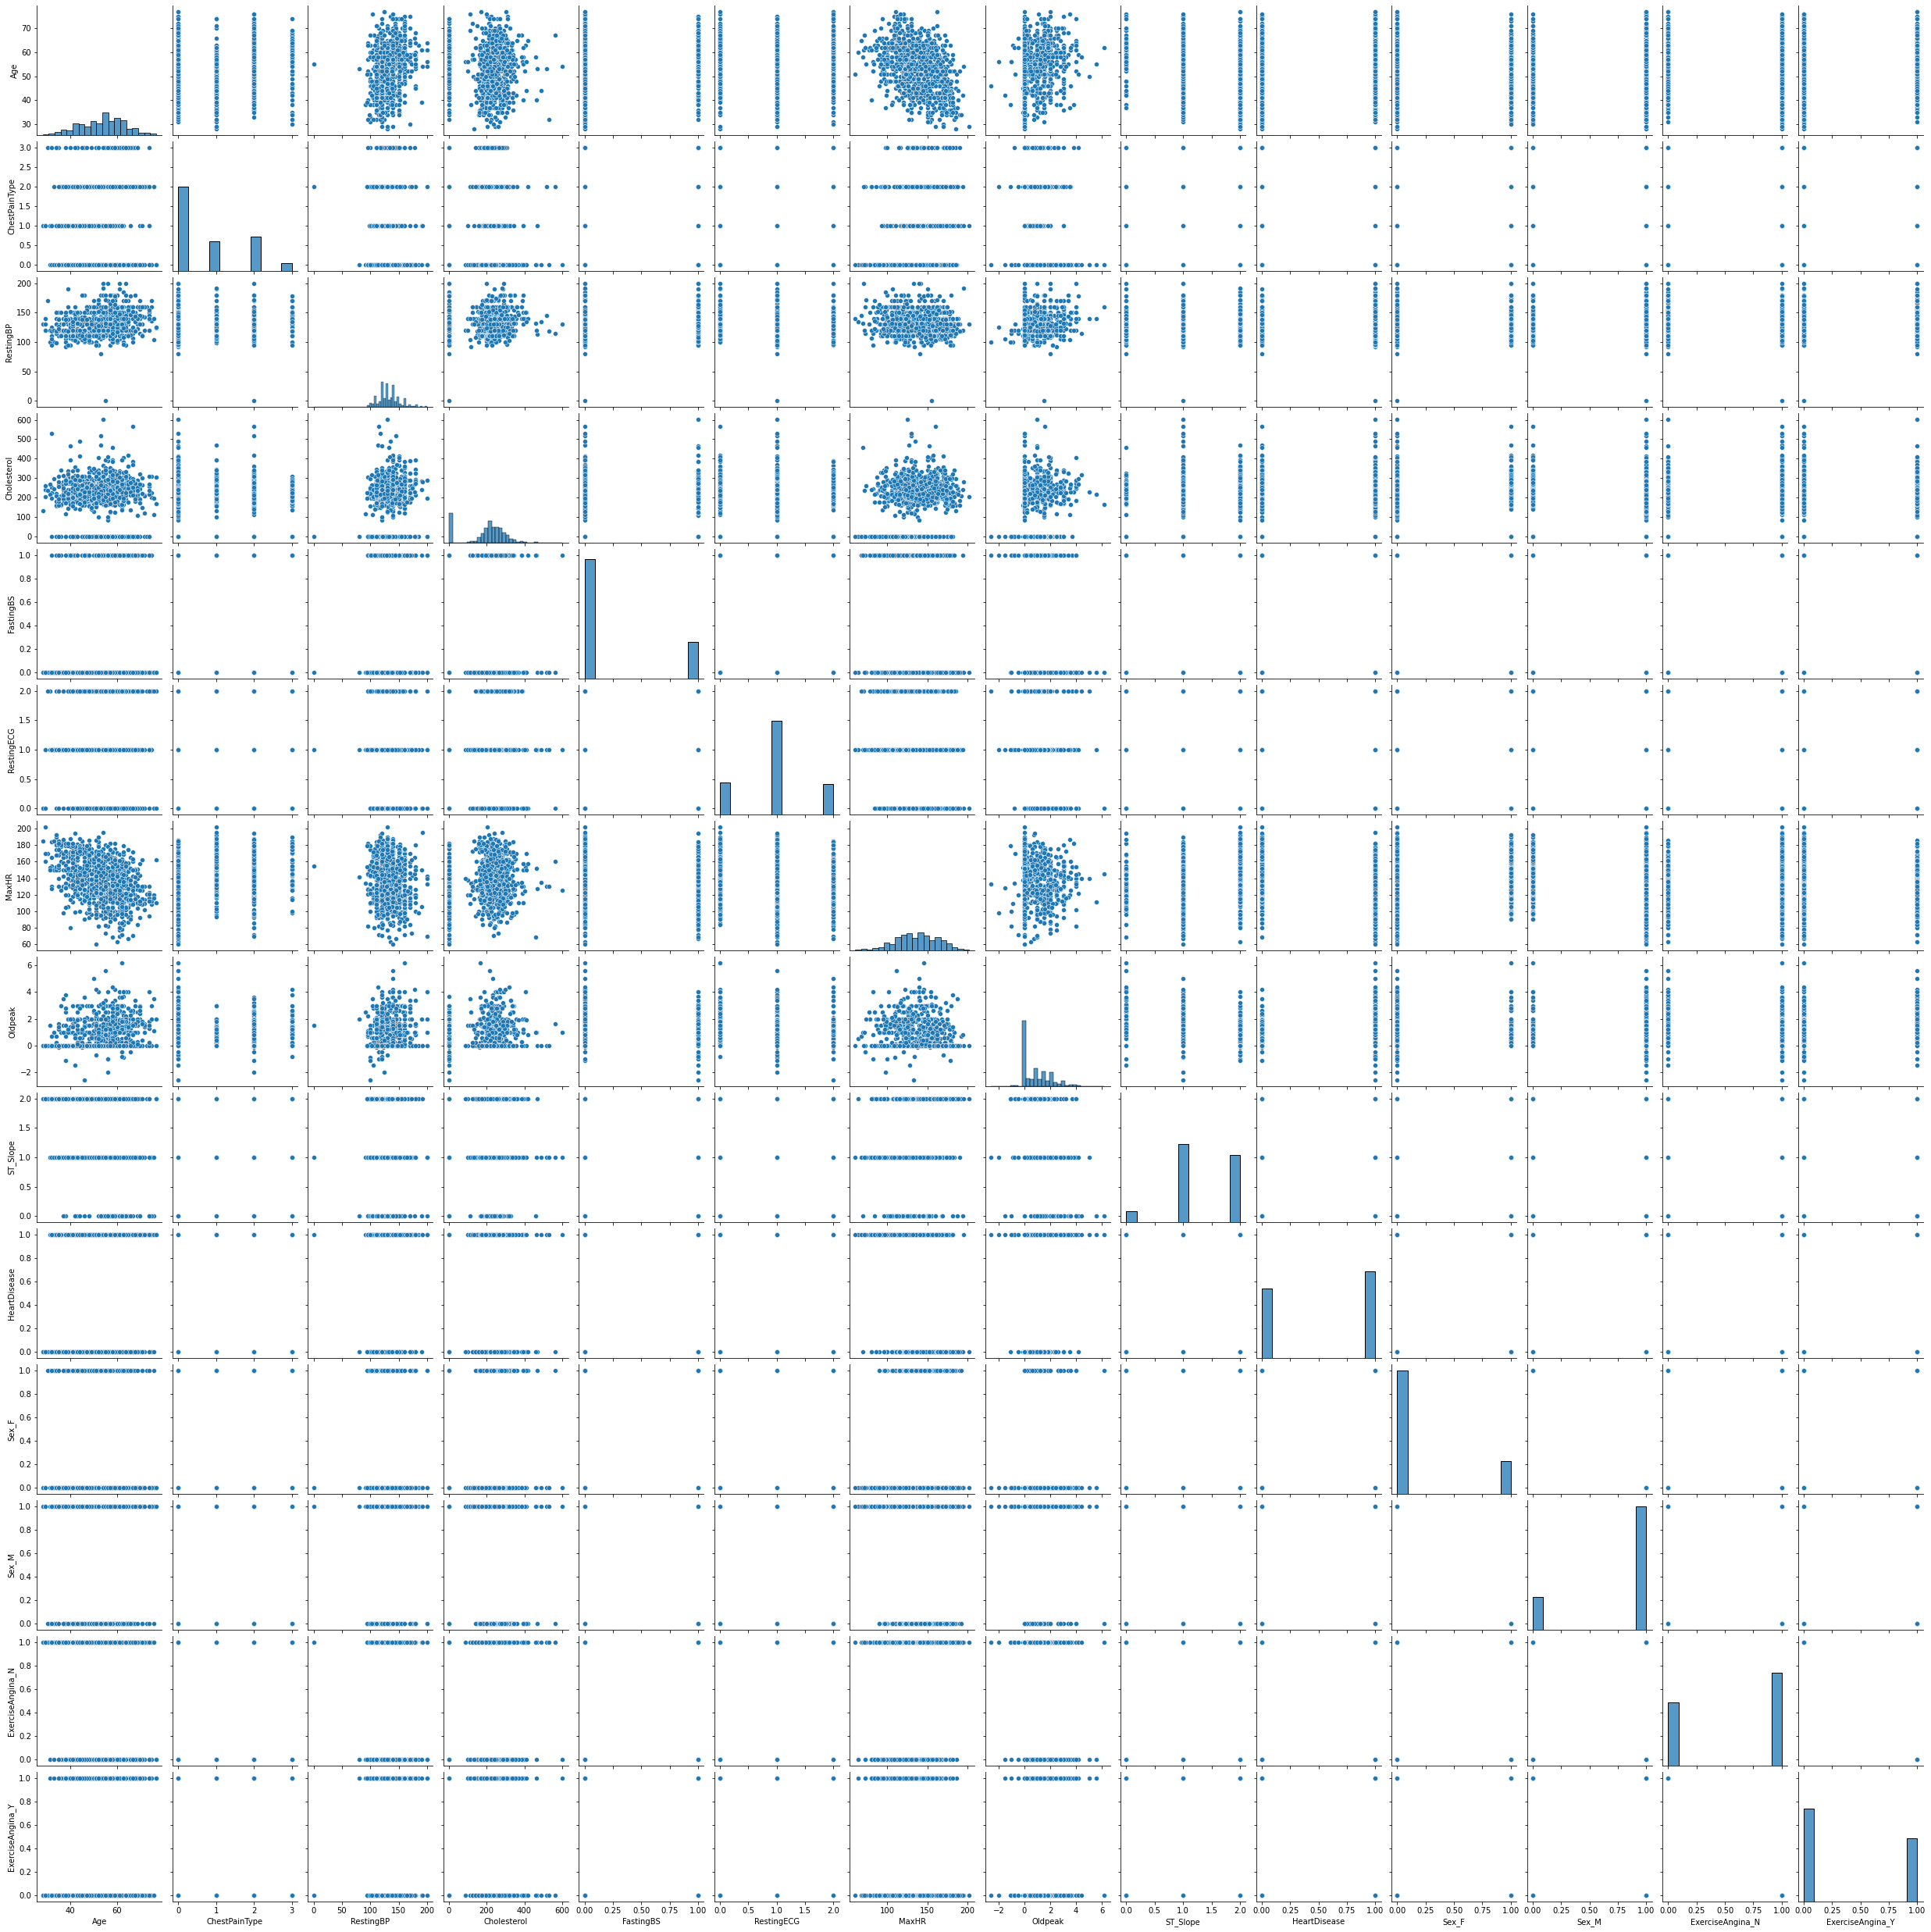

In [ ]:
sns.pairplot(data = data)

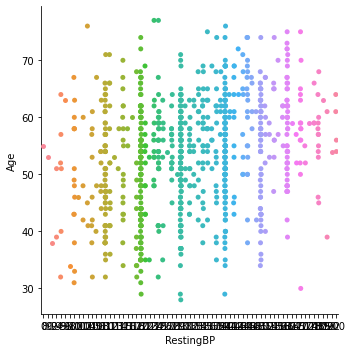

In [ ]:
sns.catplot(x = 'RestingBP', y = 'Age', hue_order = ['Sex_F', 'Sex_M'], data = data)

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

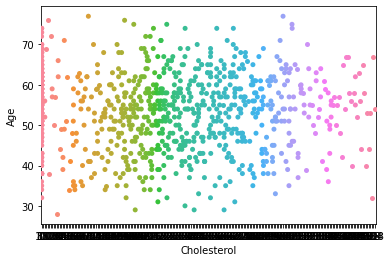

In [ ]:
sns.stripplot(x = 'Cholesterol', y = 'Age', hue_order = ['Sex_F', 'Sex_M'], data = data)

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

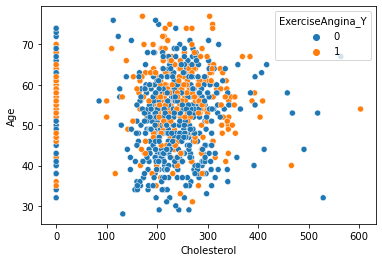

In [ ]:
sns.scatterplot(x = 'Cholesterol', y = 'Age', hue = 'ExerciseAngina_Y', data = data)

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

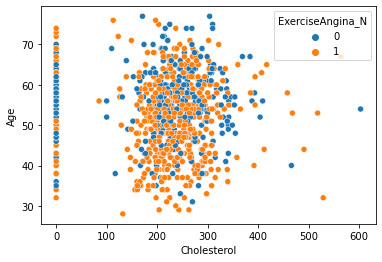

In [ ]:
sns.scatterplot(x = 'Cholesterol', y = 'Age', hue = 'ExerciseAngina_N', data = data)

<AxesSubplot:xlabel='MaxHR', ylabel='Age'>

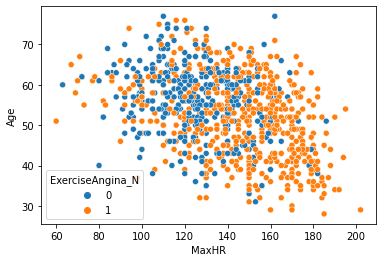

In [ ]:
sns.scatterplot(x = 'MaxHR', y = 'Age', hue = 'ExerciseAngina_N', data = data)

<AxesSubplot:xlabel='MaxHR', ylabel='Age'>

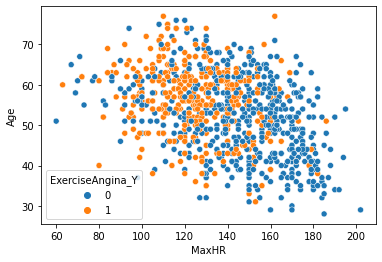

In [ ]:
sns.scatterplot(x = 'MaxHR', y = 'Age', hue = 'ExerciseAngina_Y', data = data)

<AxesSubplot:xlabel='FastingBS', ylabel='RestingECG'>

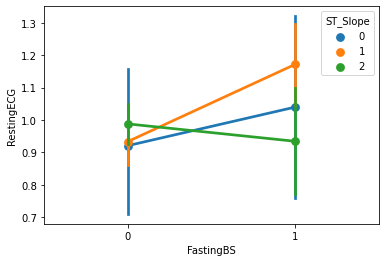

In [ ]:
sns.pointplot(x = 'FastingBS', y = 'RestingECG', hue = 'ST_Slope' , col = 'HeartDisease', data = data)

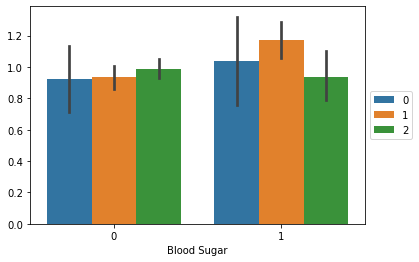

In [ ]:
ax = sns.barplot(x="FastingBS", y="RestingECG", hue= 'ST_Slope', data=data)
ax.set(ylabel="", xlabel="Blood Sugar")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Model Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X= data.drop(['HeartDisease'], axis = 1).values
y= data['HeartDisease'].values              

# Using Logistic Regression

In [ ]:
# split to 70% train dataset and 30% test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)
Ypred = clf.predict(X_test)

C:\Users\TAYO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Ypred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [ ]:
predictions = pd.DataFrame(Ypred).rename(columns= {0: 'predictions'})
predictions

,predictions
0,1
1,1
2,1
3,1
4,1
...,...
271,1
272,0
273,1
274,1


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       126
           1       0.88      0.85      0.86       150

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



# Using Cross Validation

In [ ]:
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=10, n_jobs= -1)
n_scores

array([0.65217391, 0.69565217, 0.85869565, 0.80434783, 0.72826087,
       0.60869565, 0.7826087 , 0.66304348, 0.61538462, 0.62637363])

In [ ]:
print("Cross Validation Scores: ", n_scores)
print("Average CV Score: ", n_scores.mean())
print("Number of CV Scores used in Average: ", len(n_scores))

Cross Validation Scores:  [0.65217391 0.69565217 0.85869565 0.80434783 0.72826087 0.60869565
 0.7826087  0.66304348 0.61538462 0.62637363]
Average CV Score:  0.7035236502627807
Number of CV Scores used in Average:  10


In [ ]:
from sklearn import metrics

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

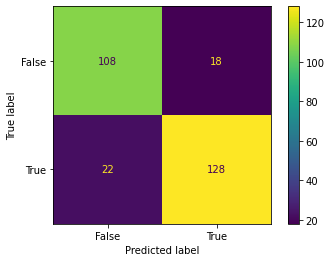

In [ ]:
ConfusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]).plot()
plt.show()

## From this matrix, out of 276 predictions, we had 108 True Negatives and 128 True Positives. 40 datapoints were predicted wrongly.